In [22]:
from keras.applications.vgg19 import VGG19
from keras.preprocessing import image
from keras.applications.vgg19 import preprocess_input
from keras.models import Model
import json
import cPickle as pk
import os
import numpy as np
import pandas as pd
from time import time
import cv2
import matplotlib.pyplot as plt
import re
from glob import 
from sklearn.model_selection import train_test_split
from time import time
%matplotlib inline

SyntaxError: invalid syntax (<ipython-input-22-71d3c050f2a2>, line 14)

In [2]:
# need to change up a dir on the server for some reason...
os.chdir('..')

In [3]:
pwd

u'/home/ubuntu/canna-recommend'

In [4]:
def create_model(output_layer='block4_pool'):
    base_model = VGG19(weights='imagenet')
    model = Model(input=base_model.input, output=base_model.get_layer(output_layer).output)
    return model

def extract_feats(img_path):
        try:
            # need to crop out logo from image
            img = image.load_img(ims[0], target_size=(250, 250))
            img = img.crop((0, 0, 224, 224))
        except IOError:
            print 'couldn\'t load file'
            return None

        x = image.img_to_array(img)
        x = np.expand_dims(x, axis=0)
        x = preprocess_input(x)

        features = model.predict(x)
        return features

In [6]:
ims = list(iglob('analytical360/images/*.jpg'))

In [7]:
ims[0]

'analytical360/images/egbsourdiesel1570533070.jpg'

In [8]:
len(ims)

3963

In [9]:
model = create_model(output_layer='block4_pool')

In [10]:
feats = extract_feats(ims[0])

In [13]:
feats[0, :, :, 0].shape # weird indexing is different than normal too... usually just feats[0][0] does it

(14, 14)

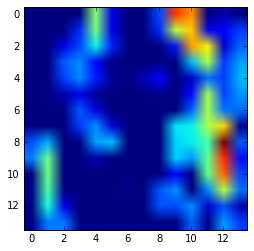

In [14]:
f = plt.imshow(feats[0, :, :, 0])

In [15]:
img = image.load_img(ims[0], target_size=(224, 224))
print img

<PIL.Image.Image image mode=RGB size=224x224 at 0x7F84074E85D0>


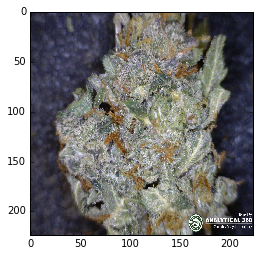

In [16]:
f = plt.imshow(img)

<PIL.Image.Image image mode=RGB size=224x224 at 0x7F8407435FD0>


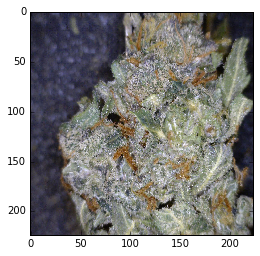

In [17]:
img = image.load_img(ims[0], target_size=(250, 250))
img = img.crop((0, 0, 224, 224))
print img
f = plt.imshow(img)

# Now for the production/training

In [18]:
model = create_model(output_layer='fc2')

In [20]:
import analytical360.scrape_360 as sc3
flow_df = pd.read_pickle('analytical360/flow_df.pk')
flow_df = sc3.clean_flow_df(flow_df, clean_names)

IOError: [Errno 2] No such file or directory: 'analytical360/flow_df.pk'

In [50]:
flow_df.iloc[0]

activated                                         0.43
cbd                                              14.92
link         http://analytical360.com/m/flowers/612153
name                                            Remedy
thc                                               0.87
im_name                               remedy612153.jpg
Name: 0, dtype: object

In [51]:
flow_df['total'] = flow_df['cbd'] + flow_df['thc']

In [53]:
target = flow_df['total'].values
ims = flow_df['im_name'].values

In [24]:
len(feats)

3963

In [25]:
len(target)

NameError: name 'target' is not defined

In [21]:
feats = []
for i in ims:
    start = time()
    feats.append(extract_feats('analytical360/new_images/' + i))
    print 'took', time() - start, 'seconds'

took 17.9502830505 seconds
took 0.0646941661835 seconds
took 0.0634851455688 seconds
took 0.0633931159973 seconds
took 0.0635671615601 seconds
took 0.063441991806 seconds
took 0.0634310245514 seconds
took 0.0635769367218 seconds
took 0.0636348724365 seconds
took 0.0611710548401 seconds
took 0.0745599269867 seconds
took 0.0742299556732 seconds
took 0.0741550922394 seconds
took 0.0740389823914 seconds
took 0.074079990387 seconds
took 0.0740427970886 seconds
took 0.0742621421814 seconds
took 0.0622999668121 seconds
took 0.0608940124512 seconds
took 0.0609290599823 seconds
took 0.0609738826752 seconds
took 0.0618939399719 seconds
took 0.061094045639 seconds
took 0.0608510971069 seconds
took 0.0606760978699 seconds
took 0.0620229244232 seconds
took 0.0611250400543 seconds
took 0.0609819889069 seconds
took 0.06072306633 seconds
took 0.0618140697479 seconds
took 0.0610771179199 seconds
took 0.0609500408173 seconds
took 0.0607290267944 seconds
took 0.0748138427734 seconds
took 0.0746171474457 

In [62]:
feats = np.array(feats)

In [ ]:
train_x, test_x, train_y, test_y = train_test_split(feats, target, random_state=42)